
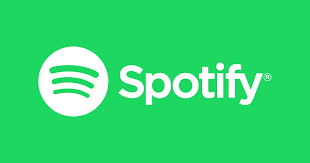

# Introduction
Have you ever wondered how music differs from country to country? 
<br>
Do the most played songs within a country share some common attributes?
<br>
How do these songs attributes differ from country to country?
<br>
Is there a common theme of the most listened songs world-wide?
<br>


If you answered yes to any of these questions keep reading because we are about to find out!
<br>
To try to answer these questions we are going to use data of *Spotify*, which is the world's largest music streaming platform by number of subscribers.



### Tutorial Content

For this tutorial we are going to use **Spotipy**.
**Spotipy** is a lightweight Python library for the Spotify Web API. With Spotipy you get full access to all of the music data provided by the Spotify platform.
We are going to analyze the "TOP 50" playlists of each of the countries in which Spotify is available. A full list of the countries in which Spotify is available can be found in the link in the References section.



### Installing the libraries

First, let's install the libraries.
Install Spotipy with:
<br>
pip install spotipy
<br>
<br>
Then import the libraries:


In [1]:
import spotipy
import spotipy.oauth2 as oauth2
from spotipy.oauth2 import SpotifyClientCredentials #To access authorized Spotify data
import pandas as pd

### Authorized requests
To make requests to the API you have to follow these steps: 
1. Have a Spotify user.
2. Register an application on the Developer Dashboard to get your credentials. https://developer.spotify.com/dashboard/login
3. Make authorized requests by either of these two methods: Authorization Code Flow and Client Credentials Flow. In this tutorial we are going to work with the last method.



**Client Credentials Flow**
<br>
Create a Spotify object to access the API
<br>
Here we first define a function to create the object, which we'll use later on.

In [2]:
def sp_object(client_id, client_secret):
    client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
    sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)
    
    return sp


In [3]:
client_id= "2582c4f549094459983e6b5589624886"
client_secret= "d59b6141e9b441159ed10cba27abb068"
sp = sp_object(client_id, client_secret)

For the purpose of this tutorial I created a cvs file with all the countries in which Spotify is available and its corresponding TOP 50 Playlist *uri*. I also added some extra information like what continent and subregion they belong to, which can be used for further analysis.

In [4]:
import pandas as pd
df = pd.read_csv (r'TOP50_COUNTRIES_PLAYLIST_URI.csv')
df

,country_code,country_name,URI,Region,Subregion
0,AE,Arab Emirates,spotify:playlist:2tSrjTxCdxxHc9J0npxYGb,Asia,Middle East
1,AR,Argentina,spotify:playlist:37i9dQZEVXbMMy2roB9myp,America,Latin America
2,AT,Austria,spotify:playlist:37i9dQZEVXbKNHh6NIXu36,Europe,Europe
3,BH,Bahrian,spotify:playlist:598uA4ClNJ0tGoAmrGTP2S,Asia,Middle East
4,BO,Bolivia,spotify:playlist:37i9dQZEVXbJqfMFK4d691,America,South America
...,...,...,...,...,...
70,LB,Lebanon,spotify:playlist:6W21hwI3VoQZSaim5ieLCq,Asia,Middle East
71,OM,Oman,spotify:playlist:0jUw7UdryJSGf2nQPP4gGL,Asia,Middle East
72,PS,Palestine,spotify:playlist:5EqbxP9txkYqaoIlJJElsS,Asia,Middle East
73,QA,Qatar,spotify:playlist:79PdSpltwUHKIN7OijUU5U,Asia,Middle East


To make the musical feature analysis of the most played songs of a country we are going to follow this process:
#### Pipeline
**Extract the data**<br>
Ouput: a dataframe per Top50 PLaylist per country with the audio features of each track.<br>
1. Define a function that returns a list of the tracks on a Top50 playlist of a country.
2. Define a function that returns the URI for each track on a TOP50 playlist of a country.
3. Define a function that generates a dictionary for each of the tracks in a Top 50 playlist of a country.
4. Define a function that generates a dataframe with these audio features per track.<br>

**Analyze the data**
<br>
**Visualize the data**
<br>
For this purpose we are using the following library.

To return a list of tracks of a Top50 playlist of a country I used the Spotipy function user_playlist_tracks. The parameters for this function are:
<br>
user - the id of the user<br>
playlist_id - the id of the playlist<br>
fields - which fields to return<br>
limit - the maximum number of tracks to return<br>
offset - the index of the first track to return<br>
market - an ISO 3166-1 alpha-2 country code.,<br>
defined the following function. <br>
Then, I defined my own function in which if you enter the name of a country in which Spotify is avaialable, you'll get the list of the tracks of that Top 50 playlist.
*The first letter of the name of te country has to be capitalized.*

In [6]:
def top50playlist_tracks(country):
    import pandas as pd
    df = pd.read_csv (r'TOP50_COUNTRIES_PLAYLIST_URI.csv')
    top50_uri = list(df['URI'])
    countries = list(df['country_name'])
    countries_uri = dict(zip(countries, top50_uri))
    tracks = sp.user_playlist_tracks('spotify', playlist_id= countries_uri[country], fields=None, limit=100, offset=0, market=None)
    return tracks

Define a function that returns the URI for each track on a TOP50 playlist of a country.

In [7]:
def uri_tracks_top50_country(country):
    tracks = top50playlist_tracks(country)
    uri_tracks = []
    name_tracks = []
    for i in range(len(tracks['items'])):
        uri = tracks['items'][i]['track']['uri']
        name = tracks['items'][i]['track']['name']
        uri_tracks.append(uri)
        name_tracks.append(name)
    
    dict_uri = dict(zip(name_tracks, uri_tracks))
        
    return dict_uri, uri_tracks, name_tracks

In the following function we are creating a dictionary for all the music features within a TOP 50 playlist, which we'll later use to create a dataframe.

In [8]:
def features_tracks(country):
    uri_tracks_top = uri_tracks_top50_country(country)[1]
    name_tracks = uri_tracks_top50_country(country)[2]
    features = sp.audio_features(list(uri_tracks_top))
    
    ft_danceability = []
    ft_energy = []
    ft_key = []
    ft_loudness = []
    ft_mode = []
    ft_speechiness = []
    ft_acousticness = []
    ft_instrumentalness = []
    ft_liveness = []
    ft_valence = []
    ft_tempo = []
    for i in range(len(features)):
        danceability = features[i]['danceability']
        energy = features[i]['energy']
        key = features[i]['key']
        loudness = features[i]['loudness']
        mode = features[i]['mode']
        speechiness = features[i]['speechiness']
        acousticness = features[i]['acousticness']
        instrumentalness = features[i]['instrumentalness']
        liveness = features[i]['liveness']
        valence = features[i]['valence']
        tempo = features[i]['tempo']
        ft_danceability.append(danceability)
        ft_energy.append(energy)
        ft_key.append(key)
        ft_loudness.append(loudness)
        ft_mode.append(mode)
        ft_speechiness.append(speechiness)
        ft_acousticness.append(acousticness)
        ft_instrumentalness.append(instrumentalness)
        ft_liveness.append(liveness)
        ft_valence.append(valence)
        ft_tempo.append(tempo)
        
        data = {'track_name': name_tracks, 
        'uri': uri_tracks_top, 
        'danceability': ft_danceability,
        'energy' : ft_energy,
        'key' :ft_key,
        'loudness': ft_loudness,
        'mode': ft_mode,
        'speechiness' : ft_speechiness,
        'acousticness':ft_acousticness,
        'instrumentalness': ft_instrumentalness,
        'liveness': ft_liveness,
        'valence': ft_valence,
        'tempo' : ft_tempo 
        }
        
       
        
    return data

In this function we generate a dataframe using the dictionary generated in the previous function.

In [9]:
def df_audioft(data):
    import pandas as pd 
    audio_df = pd.DataFrame(data)
    
    return audio_df

Now we can start creating a dataframe for the music features for each country.
For the scope of this tutorial I'm going to choose the following countries: India, Mexico, Colombia, United States, Palestine, Hong Kong, Autralia, Spain, United Kingdom, Portugal, France.

In [10]:
data_mx = features_tracks('Mexico')
df_mx = df_audioft(data_mx)


In [11]:
data_col = features_tracks('Colombia')
df_col = df_audioft(data_col)


In [12]:
data_us = features_tracks('United States')
df_us = df_audioft(data_us)


In [13]:
data_in = features_tracks('India')
df_in = df_audioft(data_in)


### Glossary
*uri*: The resource identifier that you can enter, for example, in the Spotify Desktop client’s search box to locate an artist, album, or track.<br>
Top 50 Playlist: Spotify creates these playlist based on the most listened songs of a country. These playlists are updated daily, however there's not a lot of variation from day to day, even weekly. 


### References and Resources
Spotify trends and market https://www.businessofapps.com/data/spotify-statistics/
<br>
Spotipy documentation: https://spotipy.readthedocs.io/en/latest/#
<br>
List of Countries in which Spotify is available: https://support.spotify.com/us/using_spotify/the_basics/full-list-of-territories-where-spotify-is-available/